In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_forecasts( title, weeks, weekly_cases, constant_forecast_cases, linear_forecast_cases, polynomial_forecast_cases ):
    plt.style.use('ggplot')
    plt.figure(figsize=(24,12))
    plt.plot(weeks, weekly_cases, label='Ground Truth')
    plt.plot(weeks, constant_forecast_cases, label='Constant Forecast')
    plt.plot(weeks, linear_forecast_cases, label='Linear Forecast')
    plt.plot(weeks, polynomial_forecast_cases, label='Polynomial Forecast')
    plt.xlabel("Date", fontsize=30)
    plt.ylabel("Cases", fontsize=30)
    _ = plt.xticks(rotation='vertical') # _ = is used to suppress the console output
    plt.legend(fontsize=20)
    plt.title(title, fontsize=30)
    # plt.xticks(fontsize=20)
    # plt.yticks(fontsize=20)
    # plt.legend(fontsize=30)
    # plt.ylim(0, 3000)

def perform_forecasts( data, location, forecast_horizon=1, degree=2, visualize=False ):
    data = all_data.loc[ all_data['location'] == location, [ 'date', 'value' ] ]

    # Note: this method is only appropriate for converting incident data (e.g., truth-Incident Cases.csv); it is not appropriate for converting
    # cumulative data (e.g., truth-Cumulative Cases.csv).
    # Note also that the first week is missing three days, so we fill these in with blank values.
    dates = [None, None, None]
    dates.extend( list( data['date'] ) )
    daily_cases = [0, 0, 0]
    daily_cases.extend( list( data['value'] ) )

    weeks = []
    weekly_cases = []

    # The first week is missing three days.
    for i in range( math.floor( len(dates) / 7 ) ):
        weeks.append( dates[i * 7 + 6] )
        weekly_cases.append( sum( daily_cases[ i * 7 : ( i + 1 ) * 7 ] ) )

    # print( weekly_cases )
    
    constant_forecast_cases = [ 0 ] * forecast_horizon
    constant_forecast_cases.extend( weekly_cases[: len(weekly_cases) - forecast_horizon] )

    # Approach 1:
#     linear_forecast_cases = [ 0 ] * ( forecast_horizon + 1 )
#     for i in range( forecast_horizon + 1, len(weekly_cases) ):
#         linear_forecast = weekly_cases[i - forecast_horizon] + ( weekly_cases[i - forecast_horizon] - weekly_cases[i - forecast_horizon - 1] ) * forecast_horizon
#         linear_forecast_cases.append( linear_forecast )

    # Approach 2:
    linear_forecast_cases = [ 0 ] * ( forecast_horizon * 2 )
    for i in range( forecast_horizon * 2, len(weekly_cases) ):
        linear_forecast = weekly_cases[i - forecast_horizon] + ( weekly_cases[i - forecast_horizon] - weekly_cases[i - forecast_horizon * 2] )
        linear_forecast_cases.append( linear_forecast )

    # Approach 1: Note that for degree = 1, this is equivalent to the linear Approach 1
#     degree = 1
#     polynomial_forecast_cases = [ 0 ] * ( forecast_horizon + degree )
#     for i in range( forecast_horizon + degree, len(weekly_cases) ):
#         x = list( range( 0, degree + 1) )
#         y = weekly_cases[i - forecast_horizon - degree : i - forecast_horizon + 1]
#         polynomial = np.poly1d( np.polyfit(x, y, degree) )
#         polynomial_forecast = polynomial( degree + forecast_horizon )
#         polynomial_forecast_cases.append( polynomial_forecast )

    # Approach 2: Note that for degree = 1, this is not equivalent to the linear Approach 2, unless forecast_horizon is also 1
    polynomial_forecast_cases = [ 0 ] * ( forecast_horizon * ( degree + 1 ) )
    for i in range( forecast_horizon * ( degree + 1 ), len(weekly_cases) ):
        x = list( range(0, forecast_horizon * degree + 1 ) )
        y = weekly_cases[i - forecast_horizon * ( degree + 1 ) : i - forecast_horizon + 1]
        polynomial = np.poly1d( np.polyfit(x, y, degree) )
        polynomial_forecast = polynomial( forecast_horizon * ( degree + 1 ) )
        polynomial_forecast_cases.append( polynomial_forecast )
        
    if visualize:
        location_data = all_data.loc[ all_data['location'] == location, [ 'location_name' ] ]
        location_name = location_data.iloc[0]['location_name']
        plot_forecasts( location_name + ' (' + location + ')', weeks, weekly_cases, constant_forecast_cases, linear_forecast_cases, polynomial_forecast_cases )
        
    constant_forecast_error = sum( abs( np.array(weekly_cases) - np.array(constant_forecast_cases) ) ) / len(weekly_cases)
    linear_forecast_error = sum( abs( np.array(weekly_cases) - np.array(linear_forecast_cases) ) ) / len(weekly_cases)
    polynomial_forecast_error = sum( abs( np.array(weekly_cases) - np.array(polynomial_forecast_cases) ) ) / len(weekly_cases)
    
    return constant_forecast_error, linear_forecast_error, polynomial_forecast_error

Constant Forecast Error: 2271.2597402597403
Linear Forecast Error: 3043.012987012987
Polynomial Forecast Error: 5175.306493506498


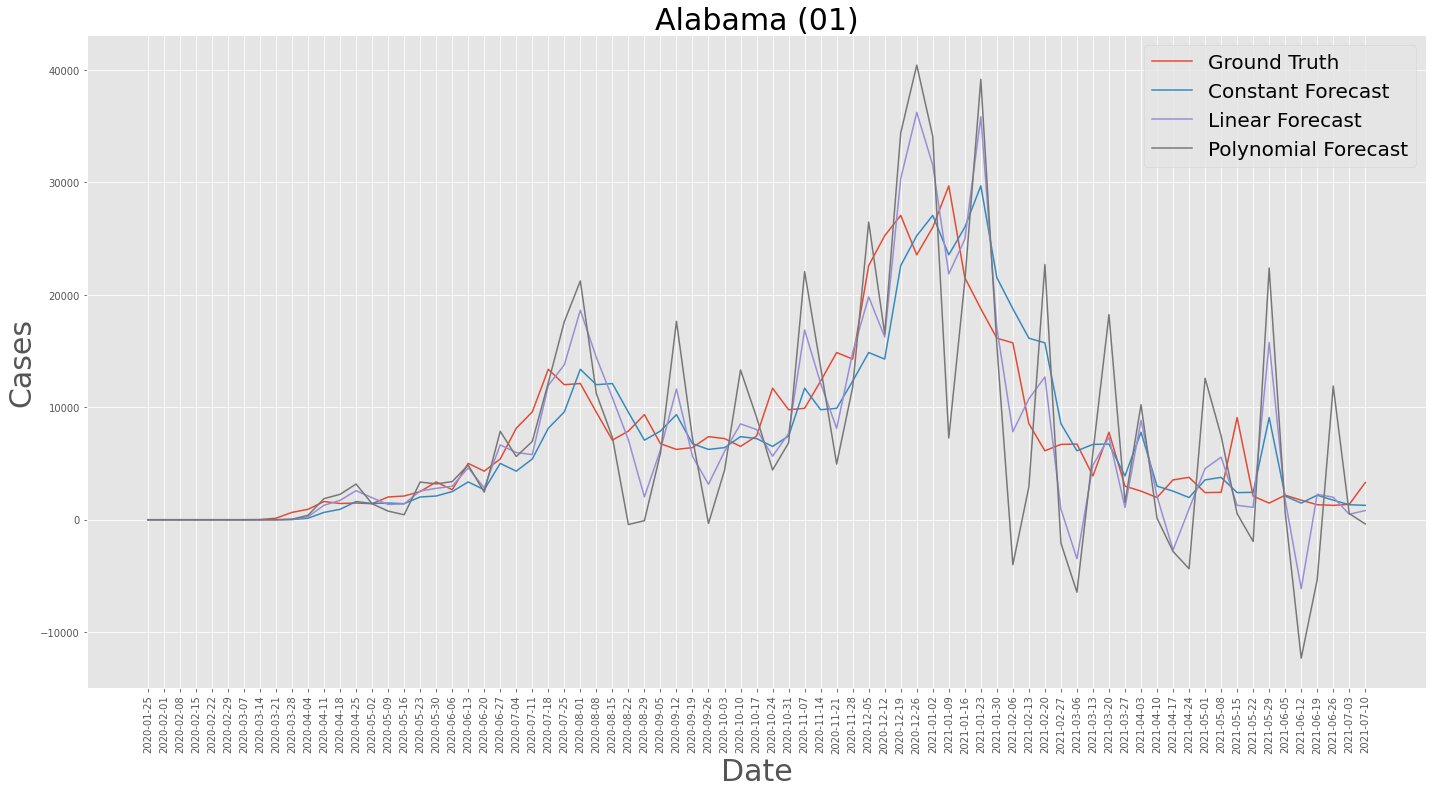

In [2]:
# Here, we plot forecasts for an example location (Alabama) and forecast horizon (2).

# The 'location' column contains both strings and integers; we represent its contents as strings.
all_data = pd.read_csv('../../covid19-forecast-hub/data-truth/truth-Incident Cases.csv', dtype={'location': 'string'})

constant_forecast_error, linear_forecast_error, polynomial_forecast_error = perform_forecasts( all_data, '01', 2, 2, visualize=True)

print( 'Constant Forecast Error: ' + str(constant_forecast_error) )
print( 'Linear Forecast Error: ' + str(linear_forecast_error) )
print( 'Polynomial Forecast Error: ' + str(polynomial_forecast_error) )

Forecast Horizon: 1
Model	US	State	County
Constant	61364.02597402597	85792.96103896103	121262.07792207783
Linear	52203.38961038961	94094.29870129869	163751.75324675295
Polynomial	79810.98701298685	158104.67532467516	287775.0129870128
Forecast Horizon: 2
Model	US	State	County
Constant	109145.25974025975	141730.01298701297	177119.2337662339
Linear	106649.45454545454	154620.8571428572	227776.0259740266
Polynomial	165194.3064935066	236570.3012987014	366828.82337662403
Forecast Horizon: 3
Model	US	State	County
Constant	147646.45454545456	192530.6103896105	227388.40259740254
Linear	159564.32467532466	225377.31168831163	299902.7272727264
Polynomial	215228.5154607301	332950.50061842956	471525.6762523196
Forecast Horizon: 4
Model	US	State	County
Constant	182448.18181818182	239302.31168831178	273619.6103896096
Linear	233050.42857142858	307534.53246753244	381370.12987013045
Polynomial	343027.2385450049	492888.66691403853	625899.0956991072


Text(0.5, 1.0, 'Constant vs. Linear vs. Polynomial Forecast Errors')

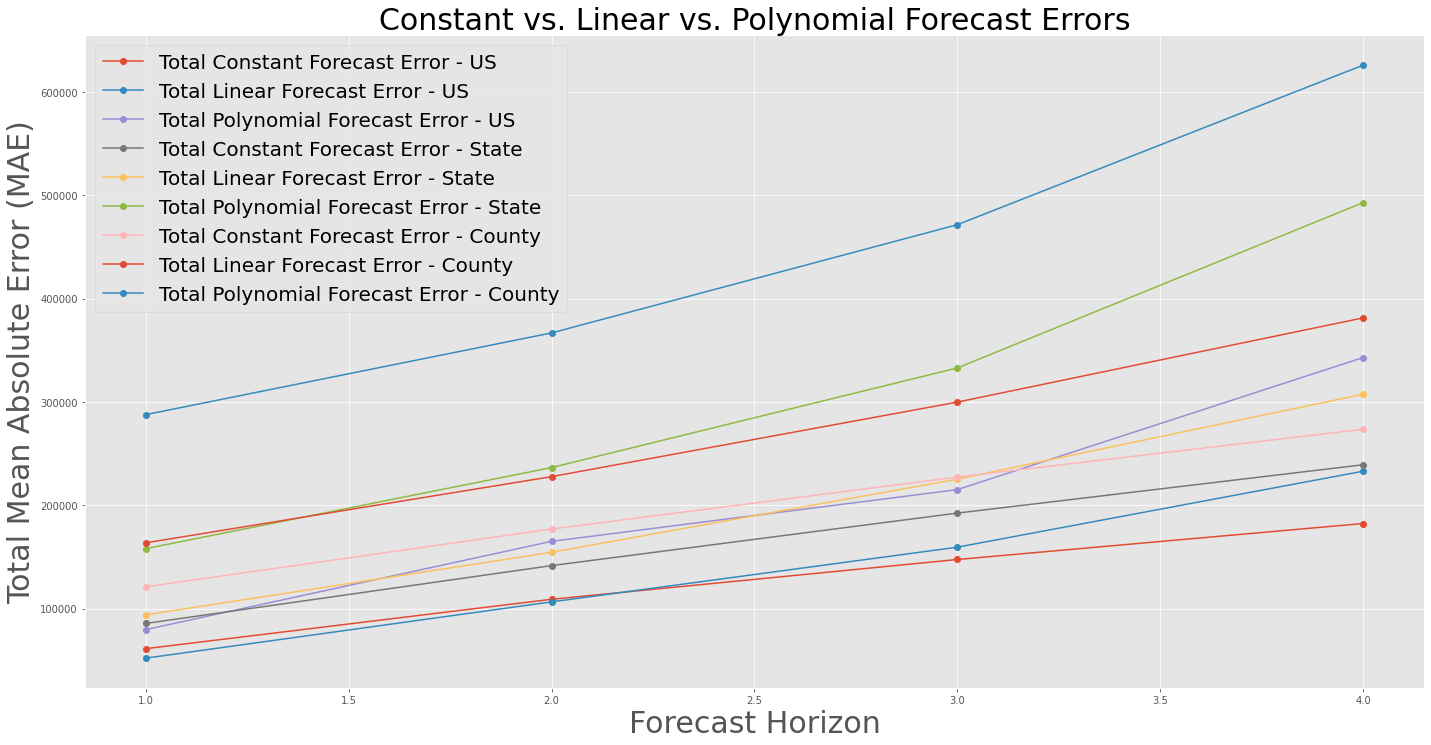

In [3]:
# Here, we evaluate the Constant, Linear and Polynomial models for all locations and forecast horizons.

locations = set( all_data['location'] )
locations = list(locations)
locations.sort()
# print( locations )

forecast_horizons = [1, 2, 3, 4]

constant_forecast_total_errors_us = []
linear_forecast_total_errors_us = []
polynomial_forecast_total_errors_us = []
constant_forecast_total_errors_state = []
linear_forecast_total_errors_state = []
polynomial_forecast_total_errors_state = []
constant_forecast_total_errors_county = []
linear_forecast_total_errors_county = []
polynomial_forecast_total_errors_county = []

for forecast_horizon in forecast_horizons:
    constant_forecast_total_error_state = 0
    linear_forecast_total_error_state = 0
    polynomial_forecast_total_error_state = 0
    constant_forecast_total_error_county = 0
    linear_forecast_total_error_county = 0
    polynomial_forecast_total_error_county = 0
    
    print( 'Forecast Horizon: ' + str(forecast_horizon) )
    print( 'Model\tUS\tState\tCounty' )
    constant_error_string = ''
    linear_error_string = ''
    polynomial_error_string = ''
    
    for location in locations:
        location_data = all_data.loc[ all_data['location'] == location, [ 'location_name' ] ]
        location_name = location_data.iloc[0]['location_name']
        # print( str( location ) + '\t' + str( location_data.iloc[0]['location_name'] ) )
        constant_forecast_error, linear_forecast_error, polynomial_forecast_error = perform_forecasts( all_data, location, forecast_horizon, 2 ) # , visualize=(len(location)==2) )
        
        if location == 'US':
            constant_forecast_total_errors_us.append( constant_forecast_error )
            linear_forecast_total_errors_us.append( linear_forecast_error )
            polynomial_forecast_total_errors_us.append( polynomial_forecast_error )
            
            constant_error_string += 'Constant\t' + str(constant_forecast_error)
            linear_error_string += 'Linear\t' + str(linear_forecast_error)
            polynomial_error_string += 'Polynomial\t' + str(polynomial_forecast_error)
        elif len( location ) == 2:
            constant_forecast_total_error_state += constant_forecast_error
            linear_forecast_total_error_state += linear_forecast_error
            polynomial_forecast_total_error_state += polynomial_forecast_error
        else:
            constant_forecast_total_error_county += constant_forecast_error
            linear_forecast_total_error_county += linear_forecast_error
            polynomial_forecast_total_error_county += polynomial_forecast_error
        
#         print( str(location) + '\t' + str(location_name) + '\t' + str( constant_forecast_error ) + '\t' + str( linear_forecast_error ) + '\t' + str( polynomial_forecast_error ) )

    constant_forecast_total_errors_state.append( constant_forecast_total_error_state )
    linear_forecast_total_errors_state.append( linear_forecast_total_error_state )
    polynomial_forecast_total_errors_state.append( polynomial_forecast_total_error_state )
    constant_forecast_total_errors_county.append( constant_forecast_total_error_county )
    linear_forecast_total_errors_county.append( linear_forecast_total_error_county )
    polynomial_forecast_total_errors_county.append( polynomial_forecast_total_error_county )
    
    constant_error_string += '\t' + str(constant_forecast_total_error_state)
    linear_error_string += '\t' + str(linear_forecast_total_error_state)
    polynomial_error_string += '\t' + str(polynomial_forecast_total_error_state)
    constant_error_string += '\t' + str(constant_forecast_total_error_county)
    linear_error_string += '\t' + str(linear_forecast_total_error_county)
    polynomial_error_string += '\t' + str(polynomial_forecast_total_error_county)
    
    print( constant_error_string )
    print( linear_error_string )
    print( polynomial_error_string )

#     print( 'Total Constant Forecast Error: ' + str(sum(constant_forecast_errors)) )
#     print( 'Total Linear Forecast Error: ' + str(sum(linear_forecast_errors)) )
#     print( 'Total Polynomial Forecast Error: ' + str(sum(polynomial_forecast_errors)) )

plt.style.use('ggplot')
plt.figure(figsize=(24,12))
plt.plot(forecast_horizons, constant_forecast_total_errors_us, marker='o', label='Total Constant Forecast Error - US')
plt.plot(forecast_horizons, linear_forecast_total_errors_us, marker='o', label='Total Linear Forecast Error - US')
plt.plot(forecast_horizons, polynomial_forecast_total_errors_us, marker='o', label='Total Polynomial Forecast Error - US')
plt.plot(forecast_horizons, constant_forecast_total_errors_state, marker='o', label='Total Constant Forecast Error - State')
plt.plot(forecast_horizons, linear_forecast_total_errors_state, marker='o', label='Total Linear Forecast Error - State')
plt.plot(forecast_horizons, polynomial_forecast_total_errors_state, marker='o', label='Total Polynomial Forecast Error - State')
plt.plot(forecast_horizons, constant_forecast_total_errors_county, marker='o', label='Total Constant Forecast Error - County')
plt.plot(forecast_horizons, linear_forecast_total_errors_county, marker='o', label='Total Linear Forecast Error - County')
plt.plot(forecast_horizons, polynomial_forecast_total_errors_county, marker='o', label='Total Polynomial Forecast Error - County')
plt.xlabel("Forecast Horizon", fontsize=30)
plt.ylabel("Total Mean Absolute Error (MAE)", fontsize=30)
plt.legend(fontsize=20)
plt.title('Constant vs. Linear vs. Polynomial Forecast Errors', fontsize=30)